<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

This project is focused on exploratory data analysis (EDA). EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to pitfalls and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those beyond this class!

Problems 1 thru 6 use a small dataset on state SAT scores.

Problems 7 thru 12 use a fraction of the Iowa Liquor Sales dataset (described in more detail in question 7).

---

This project includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like stackoverflow that have almost certainly done what you are trying to do.

**Get used to using google for finding code!** You will be using it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [119]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put in dictionary format.

The dictionary format for data will be keys as the column names/headers, and values as the row values for that column.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [133]:
sat_filepath = '/Users/katerinacapouskova/Desktop/DSI-SF-4-katerinaC/datasets/state_sat_scores/sat_scores.csv'

In [134]:
dictionary = {}
reader = csv.DictReader(open(sat_filepath))

for row in reader:
    for column, value in row.iteritems():
        dictionary.setdefault(column, []).append(value)

print dictionary

{'Verbal': ['509', '499', '511', '495', '520', '501', '500', '511', '506', '510', '501', '508', '493', '491', '499', '486', '482', '526', '498', '527', '493', '485', '514', '498', '523', '509', '539', '534', '539', '527', '543', '562', '551', '576', '550', '547', '561', '580', '577', '559', '562', '567', '577', '564', '584', '562', '575', '593', '577', '592', '566', '506'], 'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4'

### 1.2 Make a pandas DataFrame object with the sat dictionary and also with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [166]:
dict_dataframe = pd.DataFrame(dictionary)
dict_dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
Math      52 non-null object
Rate      52 non-null object
State     52 non-null object
Verbal    52 non-null object
dtypes: object(4)
memory usage: 1.7+ KB


In [135]:
sat_filepath = '/Users/katerinacapouskova/Desktop/DSI-SF-4-katerinaC/datasets/state_sat_scores/sat_scores.csv'

In [136]:
sat = pd.read_csv(sat_filepath)

In [ ]:
# in the dictionary all the values are objects, I would have to convert them to floats or ints. 

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values). 

### 1.3 Look at the first ten rows of the DataFrame and describe what the data appears to be. 

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [137]:
sat.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [138]:
sat.tail()

,State,Rate,Verbal,Math
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551
51,All,45,506,514


In [139]:
sat.shape

(52, 4)

In [140]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

This dataset is about SAT scores in different states.
There are 52 row.
There are 4 columns:
State | to what state the data belongs to | object
Rate | the attendance rate in the state | int64
Verbal | mean scores for Verbal section on SATs | int64
Math | mean scores for Math section on SATs | int64

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

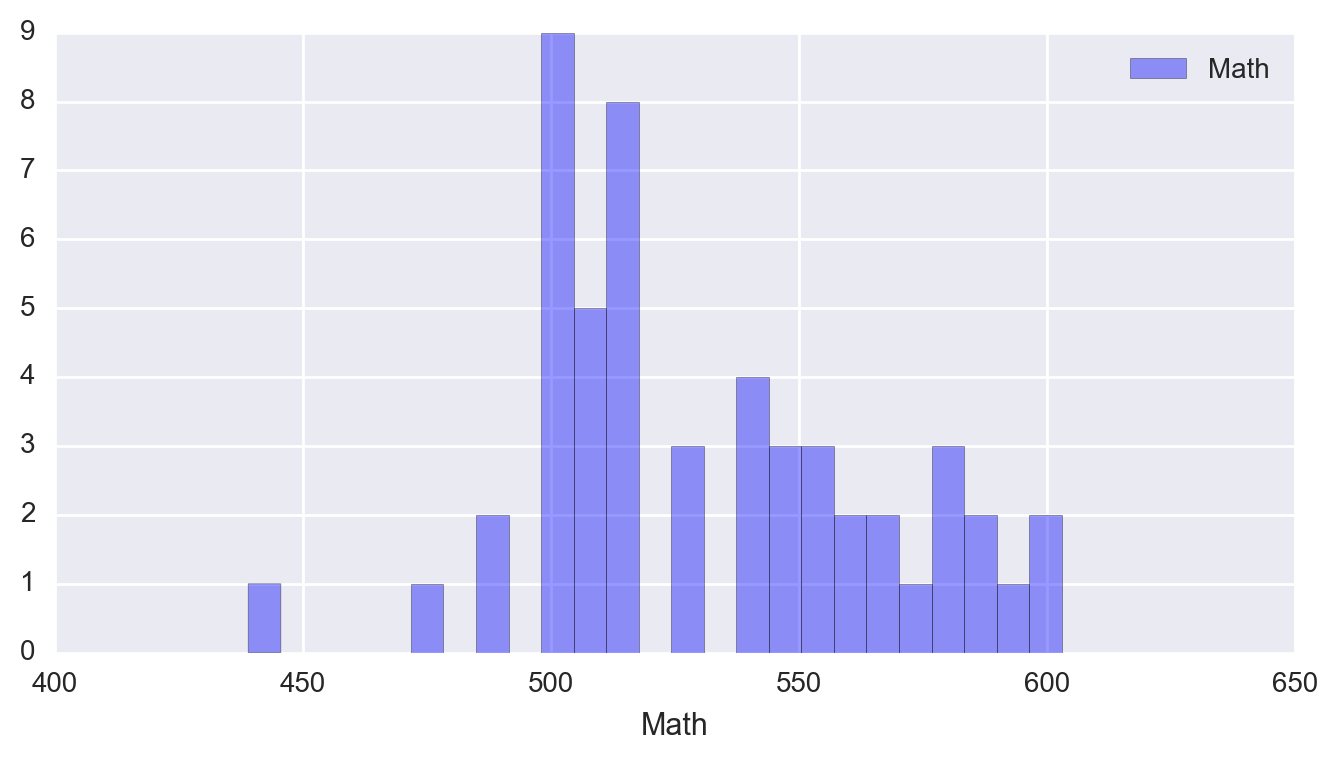

In [141]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))


sns.distplot(sat['Math'], 
             bins = 25, ax=ax, color = 'blue',
             kde=False, label='Math')

ax.legend(loc='upper right')

plt.show()

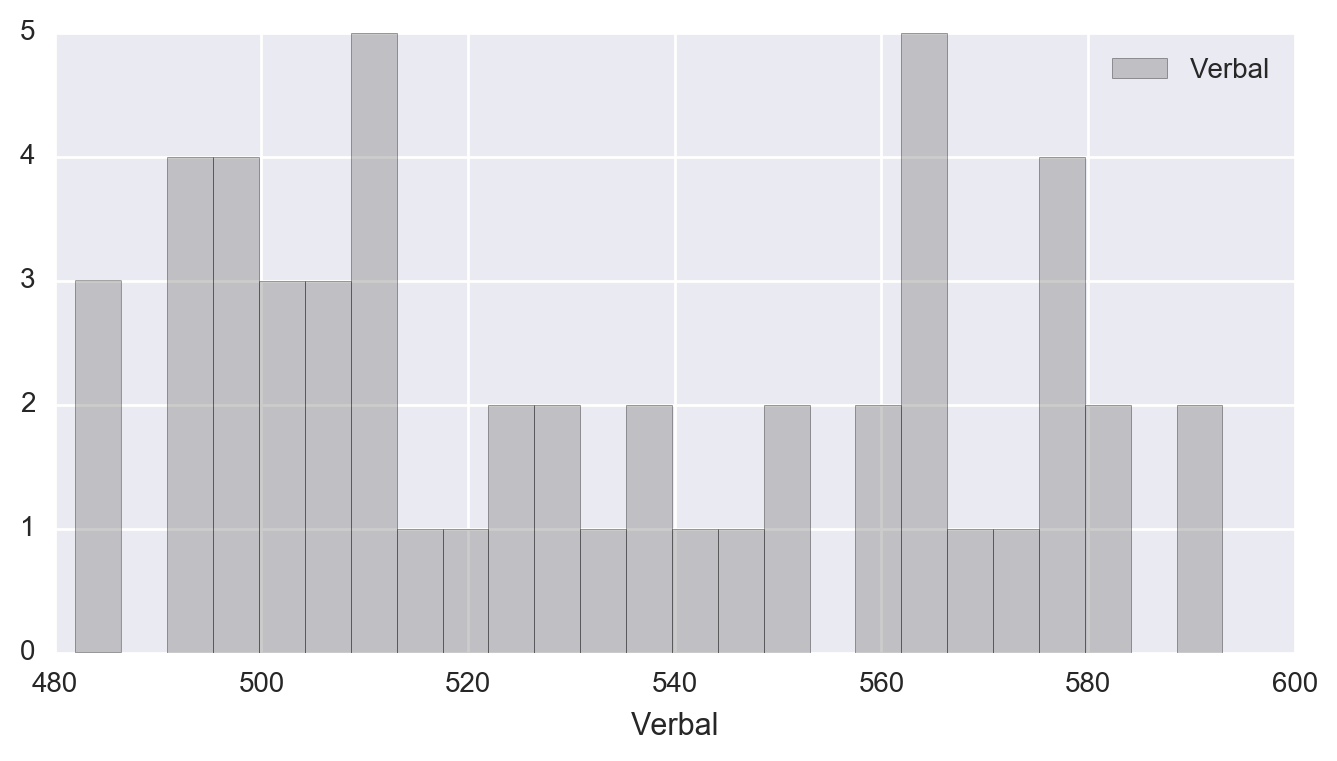

In [142]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

sns.distplot(sat['Verbal'], 
             bins = 25, ax=ax, color = 'grey',
             kde=False, label='Verbal')

ax.legend(loc='upper right')

plt.show()

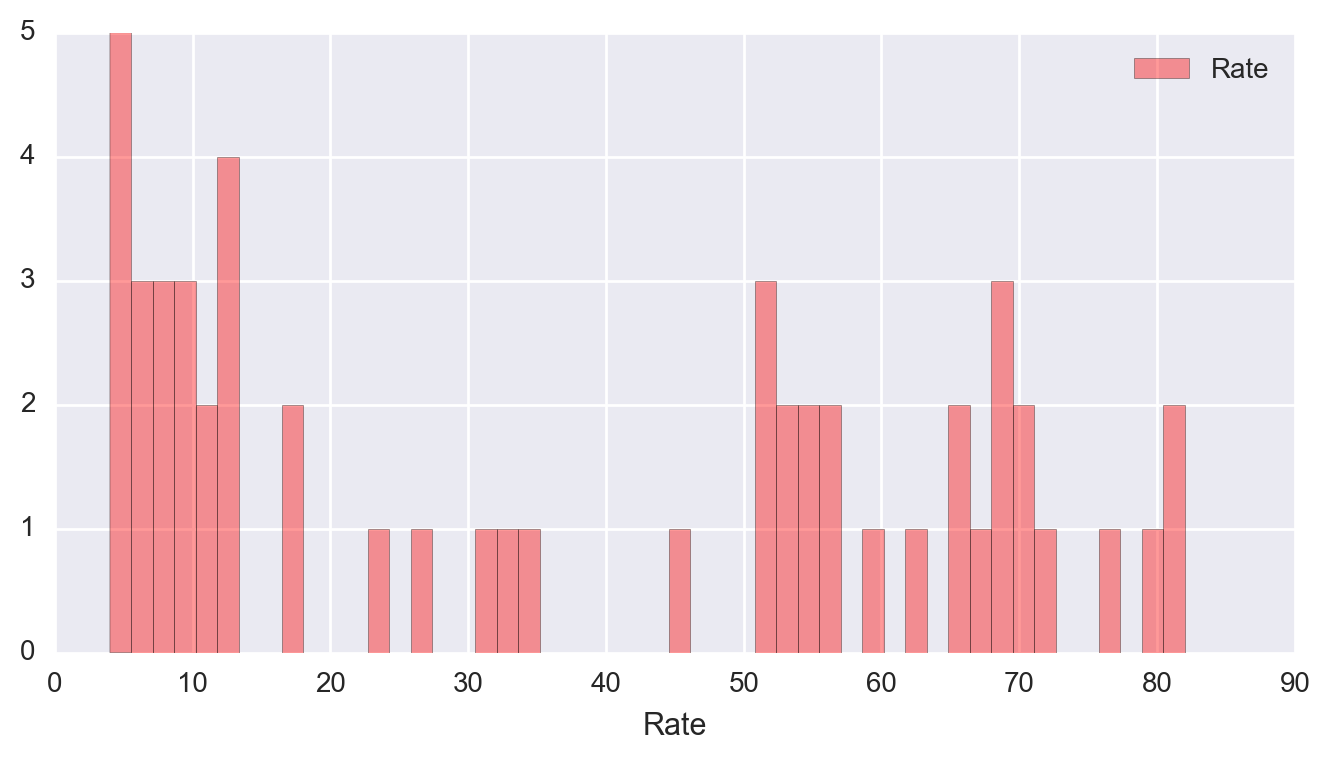

In [143]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

sns.distplot(sat['Rate'], 
             bins = 50, ax=ax, color = 'red', 
             kde=False, label='Rate')

ax.legend(loc='upper right')

plt.show()

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

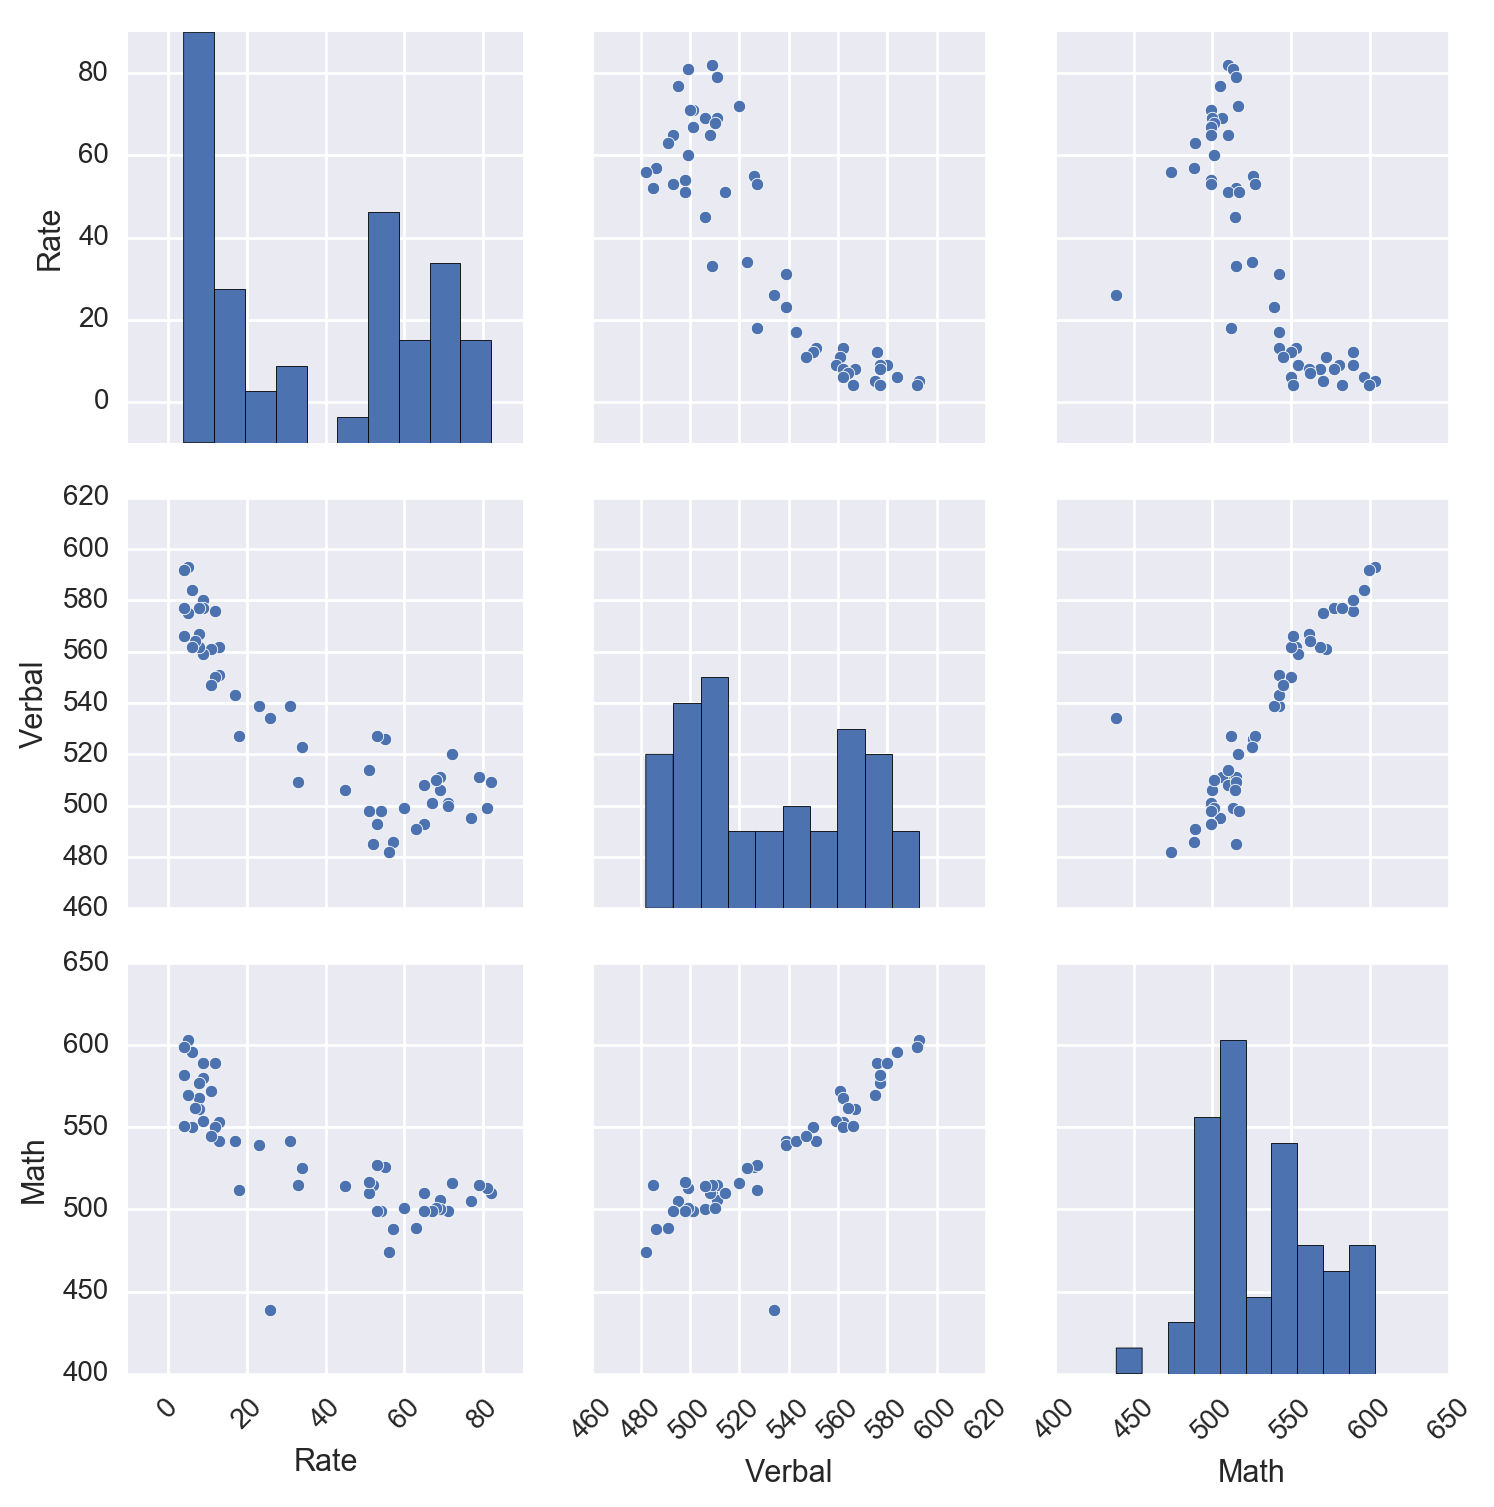

In [144]:
g = sns.pairplot(sat[["Rate", "Verbal", "Math"]], diag_kind="hist")  
for ax in g.axes.flat:  
    plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()
#The pairplot shows the relationship between our data. We would make a hypothesis that good scores in Math are
#correlated with good scores in Verbal as one would prepare for both of them. This can be seen in the Verbal/Math plots.
#Also we can also see negative correlation between participation rate and the scores. Probably the more people show up, 
#the less they are prepared. In states where participation is low, only prepared students take the test. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built in plotting functions for your data. Read the documentation here to overview and understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

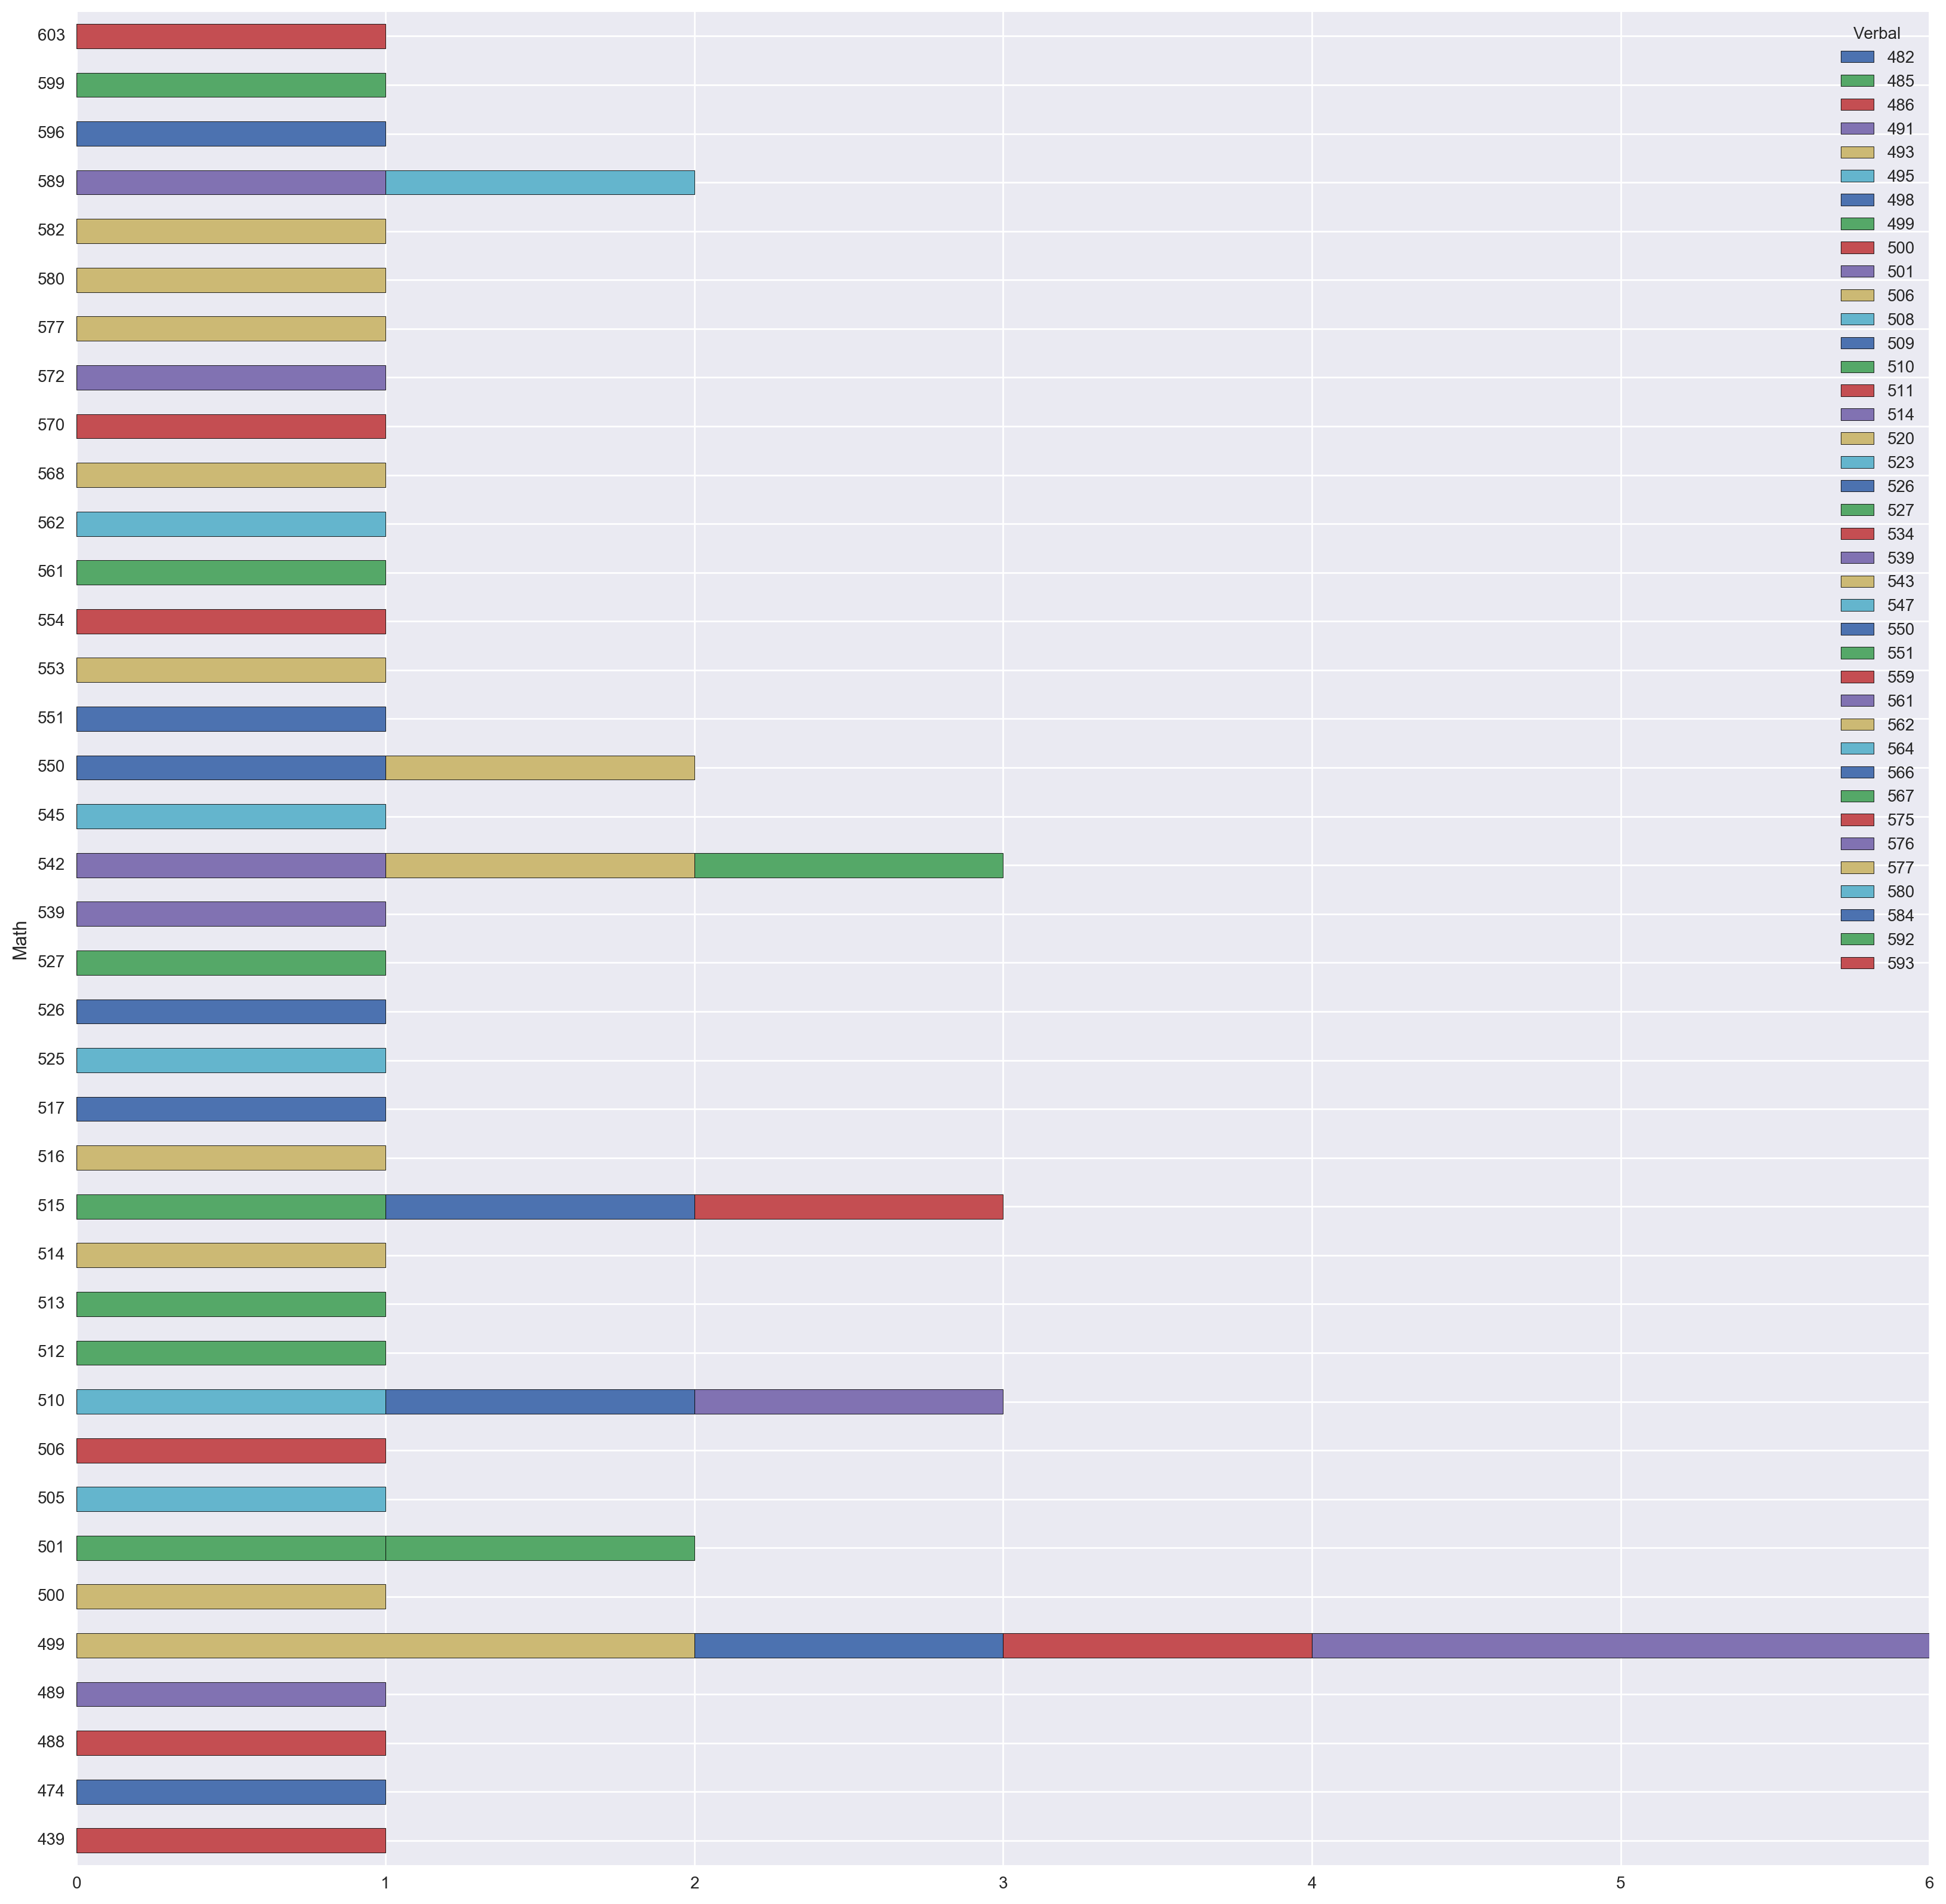

In [145]:
sat_scores = sat.groupby(["Math", 'Verbal']).size().unstack().plot(kind="barh", stacked=True, figsize=(20,20))

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots (pandas or seaborn)

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

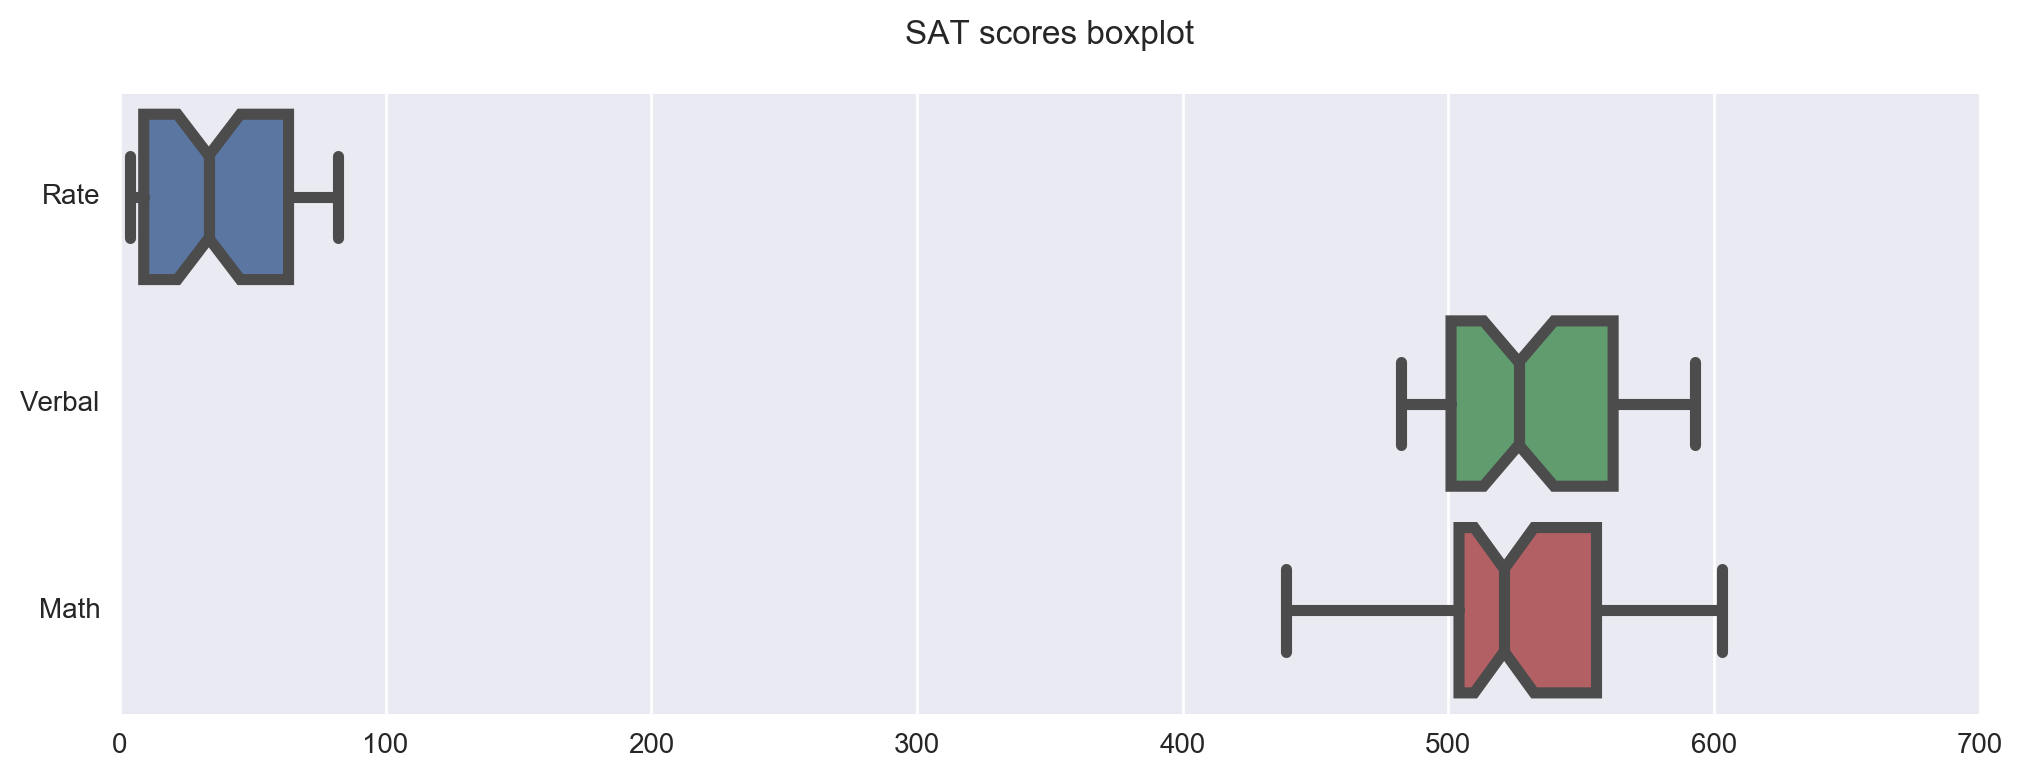

In [146]:
fig = plt.figure(figsize=(12,4))
ax = fig.gca()

ax = sns.boxplot(data=sat, orient='h', fliersize=8, linewidth=4, notch=True,
                 saturation=0.7, ax=ax)

ax.set_title('SAT scores boxplot\n')
plt.show()

#In this case boxplot shows metter some summary statistics meaning we can better see the distribution of the scores.
#The rate is only in the range 0-100, but scores are on different ranges 430-600. We cannot really compare these 
#with boxplot. 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart (pandas or seaborn)

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Recall that masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?



In [147]:
verbal_mean = np.mean(sat['Verbal'])
print verbal_mean
above_average = sat[sat.Verbal > verbal_mean]
print above_average
print above_average.count()
#There are 24 states above average. As we have 50 states, from this I would say that the dictribution seems like normal.

532.019230769
   State  Rate  Verbal  Math
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
30    ID    17     543   542
31    TN    13     562   553
32    NM    13     551   542
33    IL    12     576   589
34    KY    12     550   550
35    WY    11     547   545
36    MI    11     561   572
37    MN     9     580   589
38    KS     9     577   580
39    AL     9     559   554
40    NE     8     562   568
41    OK     8     567   561
42    MO     8     577   577
43    LA     7     564   562
44    WI     6     584   596
45    AR     6     562   550
46    UT     5     575   570
47    IA     5     593   603
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551
State     24
Rate      24
Verbal    24
Math      24
dtype: int64


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [148]:
verbal_median = np.median(sat['Verbal'])
print verbal_median
above_median = sat[sat.Verbal > verbal_median]
print above_median
print above_median.count()
#There are two more states with above median compared to above average. 
#Median is lower than mean, so I could infer that the distribution is positively skewed.

526.5
   State  Rate  Verbal  Math
19    WA    53     527   527
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
29    WV    18     527   512
30    ID    17     543   542
31    TN    13     562   553
32    NM    13     551   542
33    IL    12     576   589
34    KY    12     550   550
35    WY    11     547   545
36    MI    11     561   572
37    MN     9     580   589
38    KS     9     577   580
39    AL     9     559   554
40    NE     8     562   568
41    OK     8     567   561
42    MO     8     577   577
43    LA     7     564   562
44    WI     6     584   596
45    AR     6     562   550
46    UT     5     575   570
47    IA     5     593   603
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551
State     26
Rate      26
Verbal    26
Math      26
dtype: int64


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [149]:
sat['diff_verbal_math'] = sat['Verbal'] - sat['Math']
sat.head(10)


,State,Rate,Verbal,Math,diff_verbal_math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4
5,RI,71,501,499,2
6,PA,71,500,499,1
7,VT,69,511,506,5
8,ME,69,506,500,6
9,VA,68,510,501,9


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [150]:
verbal_states = sat.sort(columns='diff_verbal_math', ascending=False, inplace=False, axis=0).reset_index()
best_verbal = verbal_states[:10]
best_verbal.head(3)
non_verbal_states = sat.sort(columns='diff_verbal_math', ascending=True, inplace=False, axis=0).reset_index()
worst_verbal = non_verbal_states[:10]
worst_verbal.head(3)

/Applications/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':
/Applications/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,index,State,Rate,Verbal,Math,diff_verbal_math
0,21,HI,52,485,515,-30
1,23,CA,51,498,517,-19
2,1,NJ,81,499,513,-14


In [151]:
best_verbal.head(3)

,index,State,Rate,Verbal,Math,diff_verbal_math
0,27,OH,26,534,439,95
1,50,MS,4,566,551,15
2,29,WV,18,527,512,15


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [152]:
sat.corr(method='pearson', min_periods=1)
#If distinct measures in my data set are correlated (they appear at the same time). 
#Here we can see that Math and Verbal are correlated.

,Rate,Verbal,Math,diff_verbal_math
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
diff_verbal_math,-0.101412,0.052600,-0.388219,1.000000


### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [153]:
sat.describe()
#count - how many values we have in our dataset
#mean - the average
#std - standard deviation (dispertion of my dataset values)
# min- the smallest value
#25% - 1st quartile value
#50% - the middle value(median)
#75% - the third quartile value
#max - the maximal value

,Rate,Verbal,Math,diff_verbal_math
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [154]:
sat.cov(min_periods=None)

,Rate,Verbal,Math,diff_verbal_math
Rate,745.387632,-804.355958,-760.803922,-43.552036
Verbal,-804.355958,1104.646682,1077.147059,27.499623
Math,-760.803922,1077.147059,1297.078431,-219.931373
diff_verbal_math,-43.552036,27.499623,-219.931373,247.430995


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Load Iowa Liquor Sales dataset

---

The state of Iowa provides many data sets on their website, including [this dataset](https://www.dropbox.com/sh/pf5n5sgfgiri3i8/AACkaMeL_i_WgZ00rpxOOcysa?dl=0) which contains transactions for all stores that have a class E liquor license. You can choose one of the following two scenarios.

The data can also be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy), which allows you to explore it graphically and download it (though it doesn't work very well).

NOTE: Some of you may have computer issues with the full dataset. In this case, feel free to use [this 10% dataset version of Iowa liquor sales](https://drive.google.com/file/d/0Bx2SHQGVqWaseDB4QU9ZSVFDY2M/view?usp=sharing). You may want to use it anyway to test and prototype your code since it will be faster, before running it on the full dataset.


In [22]:
iowa_file = '/Users/katerinacapouskova/Desktop/DSI-SF-4-katerinaC/datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv'

In [23]:
iowa = pd.read_csv(iowa_file)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 7.1 Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [24]:
iowa.info()
#the data set has 18 column. The data types are: float64(4), int64(5), object(9), 
#memory usage is pretty big (large dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4), int64(

In [25]:
iowa.head(20)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.00,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.50,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.00,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.50,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.00,5.55
5,04/20/2015,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,New Amsterdam Gin,1750,$13.32,$19.98,6,$119.88,10.50,2.77
6,08/05/2015,2596,OTTUMWA,52501,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,Korbel Brandy,750,$6.66,$9.99,3,$29.97,2.25,0.59
7,06/25/2015,3456,CLEAR LAKE,50428,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,10628,Canadian Club Whisky,1750,$15.75,$23.63,2,$47.26,3.50,0.92
8,01/04/2016,4757,BONDURANT,50035,77.0,Polk,1032080.0,IMPORTED VODKA,370,34006,Absolut Swedish Vodka 80 Prf,750,$11.49,$17.24,4,$68.96,3.00,0.79
9,11/10/2015,4346,SHELLSBURG,52332,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,65,82610,Dekuyper Hot Damn!,1000,$7.62,$11.43,2,$22.86,2.00,0.53


In [92]:
iowa_filepath = '/Users/katerinacapouskova/Desktop/DSI-SF-4-katerinaC/datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv'

In [93]:
iowa = pd.read_csv(iowa_filepath)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Clean the liquor dataset

---

### 8.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [94]:
def price_clean(x):
    x = x.replace('$','')
    try:
        return float(x)
    except:
        return np.nan
    
iowa['State Bottle Cost'] = iowa['State Bottle Cost'].map(price_clean)

iowa['State Bottle Retail'] = iowa['State Bottle Retail'].map(price_clean)

iowa['Sale (Dollars)'] = iowa['Sale (Dollars)'].map(price_clean)

iowa.head(20)


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.00,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.50,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.00,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.50,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.00,5.55
5,04/20/2015,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,New Amsterdam Gin,1750,13.32,19.98,6,119.88,10.50,2.77
6,08/05/2015,2596,OTTUMWA,52501,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,Korbel Brandy,750,6.66,9.99,3,29.97,2.25,0.59
7,06/25/2015,3456,CLEAR LAKE,50428,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,10628,Canadian Club Whisky,1750,15.75,23.63,2,47.26,3.50,0.92
8,01/04/2016,4757,BONDURANT,50035,77.0,Polk,1032080.0,IMPORTED VODKA,370,34006,Absolut Swedish Vodka 80 Prf,750,11.49,17.24,4,68.96,3.00,0.79
9,11/10/2015,4346,SHELLSBURG,52332,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,65,82610,Dekuyper Hot Damn!,1000,7.62,11.43,2,22.86,2.00,0.53


In [ ]:
iowa.tail(10)

In [95]:
iowa.shape

(270955, 18)

In [117]:
iowa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 20 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null float64
State Bottle Retail      270955 non-null float64
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null float64
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
Liquor Category        

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 8.2 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Though resolving them may not be required for EDA and analysis, if you want experience with "deeper" cleaning of data this is a great dataset to start practicing with.

Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life for a data scientist. This isn't a kind of programming where things are just right or wrong.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to handle missing data for stores not open for the full 2015 year. Do you impute? Remove the stores? Something else?
3. Implement your plan.
4. Briefly report on what you did and why.


In [29]:
len(iowa['Store Number'].unique()) 
#How many stores are in the data set.

1400

In [ ]:
# def date_time(x):
#     try:
#         if '/12/' in x and '/01/' in x and '/3/' in x and '/6/' in x and '/9/':
#             return x
#         else:
#             del x
#     except:
#         return np.nan
    
        
# iowa['Whole Year Stores'] = iowa['Date'].map(date_time)

#This is how I would filter the stores (delete them), but I am not going to apply that because I think it is not that important. 
#It would be necessary for questions about counties, where new stores opened or old one closed, but we are doing an analysis 
#that is not really looking into opened/closed stores.

In [50]:
iowa.head(2)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 10. Examine liquor profits

---

You are a data scientist in residence at the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 10.1 Calculate yearly liquor sales for each store in 2015.

In [53]:
iowa_pivot = pd.pivot_table(iowa,index=["Store Number", 'County'])
iowa_pivot.head()
#the yearly sale for each store are in the column 'Sale (Dollars)'

,,Bottle Volume (ml),Bottles Sold,Category,County Number,Item Number,Sale (Dollars),State Bottle Cost,State Bottle Retail,Vendor Number,Volume Sold (Gallons),Volume Sold (Liters)
Store Number,County,,,,,,,,,,,
2106,Black Hawk,913.379205,19.246177,1.049258e+06,7.0,63420.025994,270.412798,10.327095,15.502798,268.764526,4.787232,18.118654
2113,Webster,954.483696,4.510870,1.039169e+06,94.0,44539.489130,61.826739,10.838152,16.267717,234.907609,1.201250,4.548098
2130,Black Hawk,935.903733,17.988212,1.046546e+06,7.0,51228.157171,274.513831,10.018114,15.032770,255.249509,4.385029,16.597780
2152,Cerro Gordo,1055.124224,4.161491,1.040562e+06,17.0,39321.844720,53.576025,8.526708,12.829193,240.652174,1.182547,4.477453
2178,Allamakee,1026.694915,8.162712,1.044011e+06,3.0,47664.494915,101.398915,9.606576,14.432203,238.738983,2.183356,8.264136


### 10.2 Calculate the profit each store is making in 2015.


In [114]:
#Each profit is calculated in the 'profit' column
iowa_pivot['profit'] = iowa_pivot['Sale (Dollars)'] - (iowa_pivot['State Bottle Cost'] * iowa_pivot['Bottles Sold']) 
iowa_pivot.head()

,,Bottle Volume (ml),Bottles Sold,Category,County Number,Item Number,Sale (Dollars),State Bottle Cost,State Bottle Retail,Vendor Number,Volume Sold (Gallons),Volume Sold (Liters),profit,Profit on gallon
Store Number,County,,,,,,,,,,,,,
2106,Black Hawk,913.379205,19.246177,1.049258e+06,7.0,63420.025994,270.412798,10.327095,15.502798,268.764526,4.787232,18.118654,71.655700,1.081147
2113,Webster,954.483696,4.510870,1.039169e+06,94.0,44539.489130,61.826739,10.838152,16.267717,234.907609,1.201250,4.548098,12.937248,4.519929
2130,Black Hawk,935.903733,17.988212,1.046546e+06,7.0,51228.157171,274.513831,10.018114,15.032770,255.249509,4.385029,16.597780,94.305872,1.143586
2152,Cerro Gordo,1055.124224,4.161491,1.040562e+06,17.0,39321.844720,53.576025,8.526708,12.829193,240.652174,1.182547,4.477453,18.092209,3.638321
2178,Allamakee,1026.694915,8.162712,1.044011e+06,3.0,47664.494915,101.398915,9.606576,14.432203,238.738983,2.183356,8.264136,22.983201,2.210188


### 10.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [115]:
iowa_pivot['Profit on gallon'] = iowa_pivot['profit'] / iowa_pivot["Volume Sold (Gallons)"]
counties_profit = iowa_pivot.sort(columns='Profit on gallon', ascending=False, inplace=False, axis=0).reset_index()
counties_profit.head(20)
#These counties are listed in 'County' column. These are: Jonhson, Polk, Pottawattamie, and Dickinson.

/Applications/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Store Number,County,Bottle Volume (ml),Bottles Sold,Category,County Number,Item Number,Sale (Dollars),State Bottle Cost,State Bottle Retail,Vendor Number,Volume Sold (Gallons),Volume Sold (Liters),profit,Profit on gallon
0,5053,Johnson,750.000000,1.000000,1.012200e+06,52.0,905690.000000,67.490000,44.990000,67.490000,260.000000,0.200000,0.750000,22.500000,112.500000
1,9001,Johnson,718.750000,37.250000,1.025912e+06,52.0,31795.250000,1204.865000,18.973333,28.462500,125.000000,7.232917,27.375000,498.108333,68.866870
2,4669,Polk,419.010417,5.708333,1.045382e+06,77.0,910156.208333,128.925312,18.750312,28.127917,870.020833,0.444271,1.684583,21.892279,49.276876
3,5201,Dubuque,375.000000,7.666667,1.048763e+06,31.0,41808.666667,96.593333,7.913333,11.873333,238.333333,0.760000,2.876667,35.924444,47.269006
4,9023,Carroll,750.000000,24.000000,1.011200e+06,14.0,26996.000000,633.360000,17.590000,26.390000,116.000000,4.760000,18.000000,211.200000,44.369748
5,3521,Pottawattamie,1068.027211,11.904762,1.046395e+06,78.0,52271.619048,319.234694,14.869796,22.310612,254.897959,3.547007,13.428571,142.213314,40.093894
6,9018,Dubuque,750.000000,300.000000,1.062310e+06,31.0,46686.000000,6435.000000,14.300000,21.450000,207.000000,59.440000,225.000000,2145.000000,36.086810
7,4069,Wapello,1099.025974,14.844156,1.037136e+06,90.0,43227.142857,281.338831,10.355325,15.564545,256.116883,3.659740,13.853896,127.622778,34.872086
8,5161,Pottawattamie,287.500000,5.785714,1.032196e+06,78.0,33830.785714,33.100000,3.352143,5.030000,129.785714,0.456429,1.732143,13.705459,30.027610
9,9010,Warren,663.235294,21.176471,1.055059e+06,91.0,50772.117647,349.143529,11.798824,17.701765,86.000000,3.444118,13.023529,99.286090,28.827729


In [71]:
iowa['Category Name'].unique()

array(['APRICOT BRANDIES', 'BLENDED WHISKIES', 'STRAIGHT BOURBON WHISKIES',
       'AMERICAN COCKTAILS', 'VODKA 80 PROOF', 'AMERICAN DRY GINS',
       'AMERICAN GRAPE BRANDIES', 'CANADIAN WHISKIES', 'IMPORTED VODKA',
       'CINNAMON SCHNAPPS', 'SINGLE BARREL BOURBON WHISKIES',
       'PEPPERMINT SCHNAPPS', 'VODKA FLAVORED', '100 PROOF VODKA',
       'DISTILLED SPIRITS SPECIALTY', 'TEQUILA', 'TENNESSEE WHISKIES',
       'WHISKEY LIQUEUR', 'MISC. AMERICAN CORDIALS & LIQUEURS',
       'APPLE SCHNAPPS', 'CHERRY BRANDIES',
       'MISC. IMPORTED CORDIALS & LIQUEURS', 'IMPORTED DRY GINS',
       'WATERMELON SCHNAPPS', 'BLACKBERRY BRANDIES', 'SINGLE MALT SCOTCH',
       'PUERTO RICO & VIRGIN ISLANDS RUM', 'SPICED RUM', 'CREAM LIQUEURS',
       'SCOTCH WHISKIES', 'IMPORTED VODKA - MISC', 'IRISH WHISKIES',
       'FLAVORED RUM', 'IMPORTED GRAPE BRANDIES', 'SPEARMINT SCHNAPPS',
       'RASPBERRY SCHNAPPS', 'TRIPLE SEC', 'AMERICAN AMARETTO',
       'IMPORTED SCHNAPPS', 'STRAIGHT RYE WHISKIES', '

In [97]:
iowa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null float64
State Bottle Retail      270955 non-null float64
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null float64
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(7), int

### 10.4 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [101]:


def liquor(x):
    try:
        x = x.lower()
        if 'vodka' in x:
            return 'Vodka'
        elif 'coctails' in x:
            return 'Coctails'
        elif 'gin' in x:
            return 'Gin'
        elif 'amaretto' in x:
            return 'Amaretto'
        elif 'whiskey' in x:
            return 'Whiskey'
        elif 'bourbon' in x:
            return 'Whiskey'
        elif'whiskies' in x:
            return 'Whiskey'
        elif'rock' in x:
            return 'Whiskey'
        elif 'brandies' in x:
            return 'Brandy'
        elif 'schanpps' in x:
            return 'Schnapps'
        elif 'rum' in x:
            return 'Rum'
        elif 'creme' in x:
            return 'Creme'
        elif 'beer' in x:
            return 'Beer'
        else:
            return 'Other'
    except:
        return np.nan
    
        
iowa['Liquor Category'] = iowa['Category Name'].map(liquor)
            
iowa.head()


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Liquor Category
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38,Brandy
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40,Whiskey
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34,Whiskey
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77,Other
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55,Vodka


### 10.5 Do relationships exist between the broader liquor type and profit?

In [107]:
iowa['profit'] = (iowa['State Bottle Retail'] - iowa['State Bottle Cost']) * iowa['Bottles Sold']
iowa.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Liquor Category,profit
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38,Brandy,27.00
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40,Whiskey,13.76
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34,Whiskey,151.20
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77,Other,28.50
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55,Vodka,43.20


In [118]:
iowa_pivot_liquor = pd.pivot_table(iowa,index=["Liquor Category"], values=['profit'], aggfunc=np.sum).reset_index().sort_values('profit', ascending=False)
iowa_pivot_liquor.head(15)
# The most profitable category is Whiskey. 
#Table for sorted profits according to liquor categories:

,Liquor Category,profit
8,Whiskey,4.144300e+06
7,Vodka,2.794845e+06
5,Other,2.323723e+06
6,Rum,1.175568e+06
4,Gin,6.562205e+05
2,Brandy,4.877834e+05
0,Amaretto,3.764337e+04
3,Creme,8.966480e+03
1,Beer,7.034170e+03


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 11. Proposing a new liquor tax

---

### The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

In [ ]:
#As we can see from the table above, beer accounts for the smallest profits, so taxing 
#f.e.Whiskey would probably affect the profit, but not sure it that would affect the price and therefore the sales. 
#Depend on the stores - like bigger stores can sell Whiskey cheaper to account for the new tax. 
#But under here, we can see that the store with least profit actually sold vodka and schapps, so it is not 
#implied that people buy more beer in small store, therefore the tax might not work. 

In [161]:
pivot_small = pd.pivot_table(iowa, index=['Store Number'], values=['profit'], aggfunc=np.sum).reset_index().sort_values("profit", ascending=True)
pivot_small.head()

,Store Number,profit
1377,5218,6.40
800,4567,15.06
1120,4939,17.81
1220,5053,22.50
1357,5195,30.85


In [162]:
iowa[iowa["Store Number"] == 5218]

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Liquor Category,profit
9907,03/16/2016,5218,CHARITON,50049,NaN,NaN,1031200.0,VODKA FLAVORED,380,41989,Uv Cake Vodka,750,6.5,9.75,1,9.75,0.75,0.2,Vodka,3.25
21413,03/16/2016,5218,CHARITON,50049,NaN,NaN,1081312.0,BUTTERSCOTCH SCHNAPPS,65,82786,Dekuyper Buttershots Schnapps,750,6.3,9.45,1,9.45,0.75,0.2,Other,3.15


In [163]:
iowa[iowa['Store Number'] == 4567]

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Liquor Category,profit
20375,03/16/2015,4567,DES MOINES,50313,77.0,Polk,1082900.0,MISC. IMPORTED CORDIALS & LIQUEURS,259,65195,Hpnotiq,750,8.83,13.75,1,13.75,0.75,0.20,Other,4.92
70645,04/06/2015,4567,DES MOINES,50313,77.0,Polk,1012100.0,CANADIAN WHISKIES,115,10550,Black Velvet Toasted Caramel,750,6.75,10.13,3,30.39,2.25,0.59,Whiskey,10.14


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 12. Time-related effects

---

You could imagine that liquor sales might be affected by a variety of effects related to time. Do people buy more beer in the summer? Do liquor sales skyrocket in december? Do people buy less liquor on Tuesdays?

You have the date of sales in your dataset, which you can use to pull out time components.

1. Come up with 2 different hypotheses about how liquor sales may vary with time-related variables. 
2. Create a visualization exploring each hypothesis.
3. Write brief concluding remarks on what you observed.


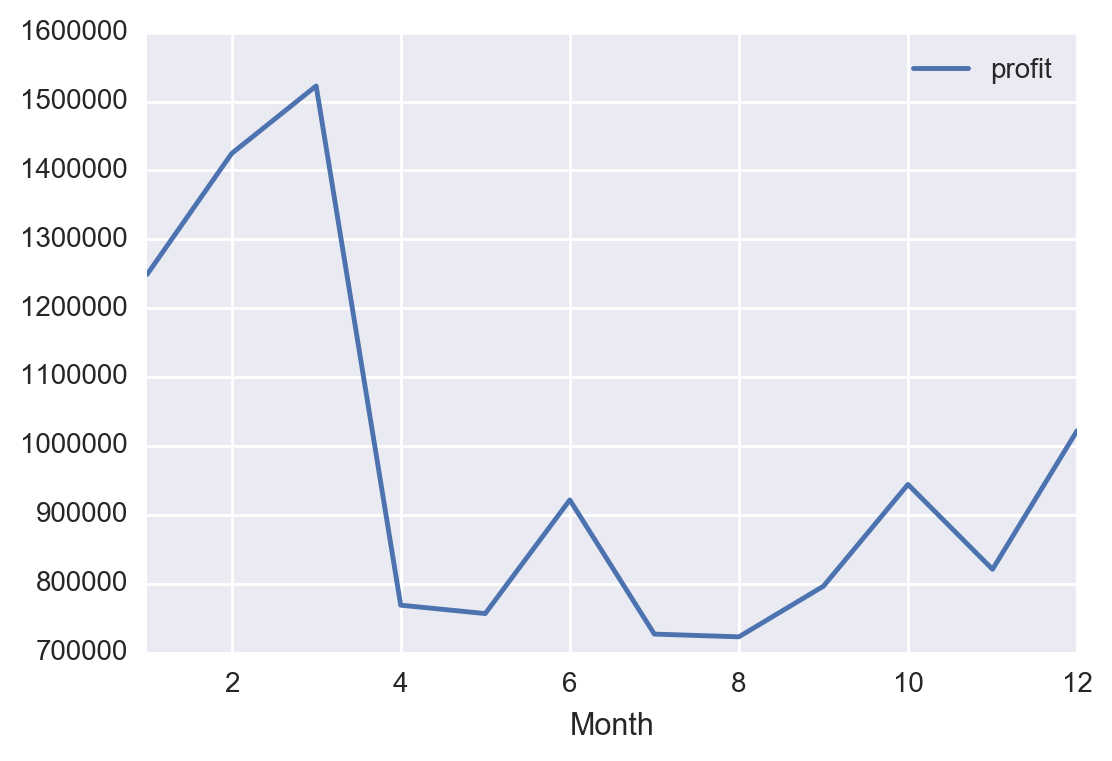

In [171]:
def month(x):
    try:
        x = x.split('/')
        x = x[0]
        return float(x)
    except:
        return np.nan
    
iowa['Month'] =iowa['Date'].map(month)

month_liq = iowa.groupby(['Month'])[['profit']].sum().reset_index()
month_liq.sort_values('profit', ascending=True)

month_liq.plot.line(x='Month', y='profit')

#The most profit is March. I assumed it would be December/January because of the various holidays and also cold weather.

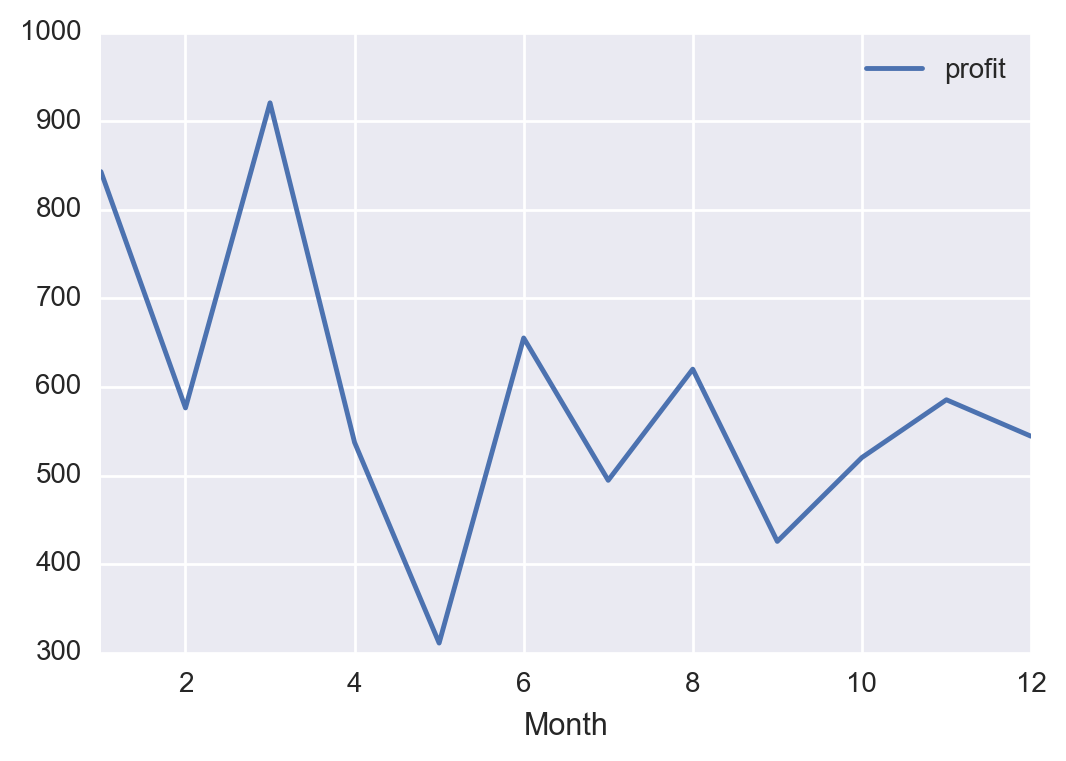

In [176]:
beer = iowa[iowa['Liquor Category'] == 'Beer']
beer_liq = beer.groupby(['Month'])[['profit']].sum().reset_index()
beer_liq.sort_values('profit', ascending=True)

beer_liq.plot.line(x='Month', y='profit')
#The profits in beer are highest in March again. The difference is not that big as in the overall profit, but 
#summer is not the biggest in beer profit (sales). 